In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as stats
df = pd.read_csv("data/incomevsvotes.csv")
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import requests
import pandas as pd

import pprint as pprint
import gzip
from datetime import datetime
from scipy.stats import linregress
df.head(20)

,Prov/Terr,FED ID,Federal Electoral Districts_x,Total,Total Income,Net Income,Taxable Income,Income per Resident,Province,Federal Electoral Districts_y,Population,Electors,Polling Stations,Valid Ballots,Percentage of Valid Ballots,Rejected Ballots,Percentage of Rejected Ballots,Total Ballots Cast,Percentage of Voter Turnout,Party Won
0,10,10001.0,Avalon,72030,3.425814e+09,3.168392e+09,3.060218e+09,47560.932945,Newfoundland and Labrador,Avalon,81540.0,68487.0,220.0,42086.0,99.6,162.0,0.4,42248.0,61.7,Liberal
1,10,10002.0,Bonavista--Burin--Trinity,64920,2.453784e+09,2.303218e+09,2.185134e+09,37797.042514,Newfoundland and Labrador,Bonavista--Burin--Trinity,76704.0,62462.0,260.0,35092.0,99.5,173.0,0.5,35265.0,56.5,Liberal
2,10,10003.0,Coast of Bays--Central--Notre Dame,65130,2.458068e+09,2.286474e+09,2.173178e+09,37740.948871,Newfoundland and Labrador,Coast of Bays--Central--Notre Dame,78092.0,64226.0,233.0,35448.0,99.6,145.0,0.4,35593.0,55.4,Liberal
3,10,10004.0,Labrador,20830,1.169248e+09,1.089412e+09,9.928980e+08,56132.885262,Newfoundland and Labrador,Labrador,26728.0,20045.0,84.0,12373.0,99.6,53.0,0.4,12426.0,62.0,Liberal
4,10,10005.0,Long Range Mountains,77250,2.914423e+09,2.714495e+09,2.579982e+09,37727.158576,Newfoundland and Labrador,Long Range Mountains,87592.0,71918.0,253.0,41824.0,99.7,108.0,0.3,41932.0,58.3,Liberal
5,10,10006.0,St. John's East,66670,3.668269e+09,3.345338e+09,3.268761e+09,55021.283936,Newfoundland and Labrador,St. John's East,81936.0,66304.0,186.0,44880.0,99.8,111.0,0.2,44991.0,67.9,Liberal
6,10,10007.0,St. John's South--Mount Pearl,66270,3.086318e+09,2.836073e+09,2.739070e+09,46571.872642,Newfoundland and Labrador,St. John's South--Mount Pearl,81944.0,67596.0,185.0,44801.0,99.7,133.0,0.3,44934.0,66.5,Liberal
7,TOTAL,NaN,NaN,433100,1.917592e+10,1.774340e+10,1.699924e+10,44275.973216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,11001.0,Cardigan,29970,1.237610e+09,1.140059e+09,1.103647e+09,41294.961628,Prince Edward Island,Cardigan,36005.0,28889.0,90.0,22485.0,99.6,96.0,0.4,22581.0,78.2,Liberal
9,11,11002.0,Charlottetown,29650,1.192487e+09,1.098089e+09,1.060050e+09,40218.785835,Prince Edward Island,Charlottetown,34562.0,28129.0,82.0,21165.0,99.5,99.0,0.5,21264.0,75.6,Liberal


In [28]:
df2=df[["Federal Electoral Districts_x","Electors", "Polling Stations" , "Income per Resident", "Party Won"]]
df3 = df2.dropna()
df3.head(20)

,Federal Electoral Districts_x,Electors,Polling Stations,Income per Resident,Party Won
0,Avalon,68487.0,220.0,47560.932945,Liberal
1,Bonavista--Burin--Trinity,62462.0,260.0,37797.042514,Liberal
2,Coast of Bays--Central--Notre Dame,64226.0,233.0,37740.948871,Liberal
3,Labrador,20045.0,84.0,56132.885262,Liberal
4,Long Range Mountains,71918.0,253.0,37727.158576,Liberal
5,St. John's East,66304.0,186.0,55021.283936,Liberal
6,St. John's South--Mount Pearl,67596.0,185.0,46571.872642,Liberal
8,Cardigan,28889.0,90.0,41294.961628,Liberal
9,Charlottetown,28129.0,82.0,40218.785835,Liberal
10,Egmont,27858.0,86.0,36846.537018,Liberal


In [35]:
df3["Polling Stations per Elector"]=(df3["Polling Stations"]/df2["Electors"])*1000
df3

,Federal Electoral Districts_x,Electors,Polling Stations,Income per Resident,Party Won,Polling Stations per Elector
0,Avalon,68487.0,220.0,47560.932945,Liberal,3.212288
1,Bonavista--Burin--Trinity,62462.0,260.0,37797.042514,Liberal,4.162531
2,Coast of Bays--Central--Notre Dame,64226.0,233.0,37740.948871,Liberal,3.627814
3,Labrador,20045.0,84.0,56132.885262,Liberal,4.190571
4,Long Range Mountains,71918.0,253.0,37727.158576,Liberal,3.517895
...,...,...,...,...,...,...
342,Victoria,94627.0,251.0,54402.281408,NDP,2.652520
343,West Vancouver--Sunshine Coast--Sea to Sky Cou...,90554.0,244.0,65617.056146,Liberal,2.694525
345,Yukon,26879.0,82.0,54732.752613,Liberal,3.050709
347,Northwest Territories,30110.0,91.0,59276.952023,Liberal,3.022252


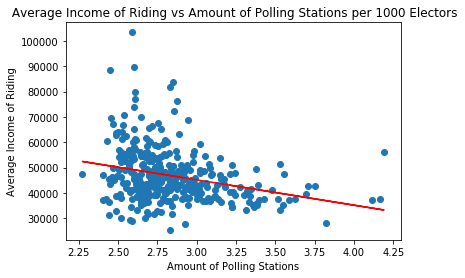

In [38]:
x_values = df3['Polling Stations per Elector']
y_values = df3['Income per Resident']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Amount of Polling Stations')
plt.ylabel('Average Income of Riding')
plt.title(f' Average Income of Riding vs Amount of Polling Stations per 1000 Electors')
plt.savefig("./PNG_images_stats/PollingStations_Age.png")
plt.show('north')

In [34]:
rvalue

-0.2790278548144469